# Análise do Desenvolvimento Humano e Econômico Global com Base no Dataset Gapminder
Este projeto utiliza o dataset Gapminder para analisar o desenvolvimento humano e econômico global. A análise foca em:

- **Tendências globais:** Evolução da expectativa de vida e PIB per capita.
- **Padrões regionais:** Disparidades entre continentes e países ao longo de cinco décadas.
- **Relações socioeconômicas:** Correlações entre PIB per capita, expectativa de vida e população.
- **Visualização de dados:** Gráficos e mapas para destacar avanços e desigualdades.

O objetivo é realizar uma Análise Exploratória de Dados (EDA) para compreender os fatores que influenciam o bem-estar global.

### Leitura dos dados
Os dados utilizados neste projeto são provenientes do Gapminder, uma organização sem fins lucrativos que disponibiliza dados estatísticos sobre desenvolvimento global. O dataset inclui informações sobre expectativa de vida, PIB per capita e população de diversos países ao longo do tempo.

In [28]:
import sys
sys.path.append('../')
from src.datasets_reader import read_gapminder_data
from src.matplot_samples import plot_line_chart ; scatter_subplots
import matplotlib.pyplot as plt
df = read_gapminder_data()

Arquivo ../datasets/gapminder_full.csv lido com sucesso.


### Exibe os dados contidos no arquivo CSV


In [2]:
df.head(5)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


### Removendo registros duplicados

In [3]:
print(f"Quandidade de registros antes da remoção de duplicados e valores nulos: {len(df)}");
df = df.drop_duplicates() #remove registros duplicados
df = df.dropna() #remove registros com valores nulos
print(f"Quandidade de registros depois da remoção de duplicados e valores nulos: {len(df)}");

Quandidade de registros antes da remoção de duplicados e valores nulos: 1736
Quandidade de registros depois da remoção de duplicados e valores nulos: 1704


### Gráfico de Média de Expectativa de Vida Por Continente Ao Longo do Anos

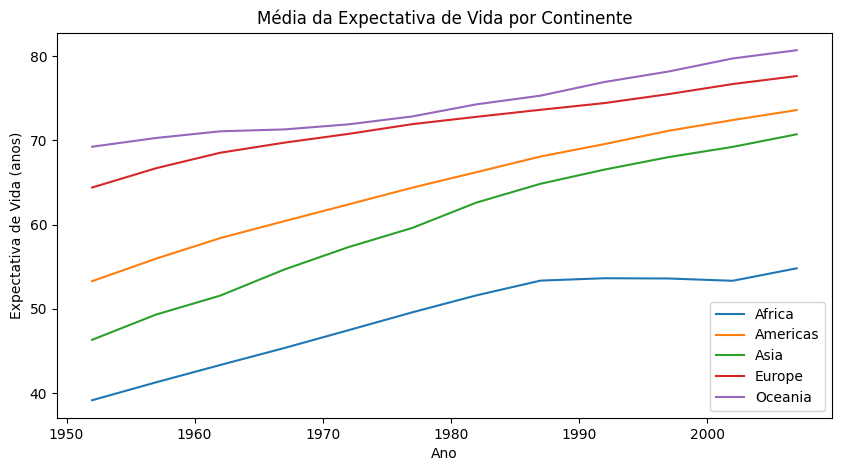

In [ ]:
groupList = df.groupby(['year', 'continent'])['lifeExp'].mean().unstack()
plot_line_chart(df, groupList, title = "Média da Expectativa de Vida por Continente", xLabel = "Ano", yLabel = "Expectativa de Vida (anos)")

### Gráfico de Média de Populacional Por Continente Ao Longo do Anos

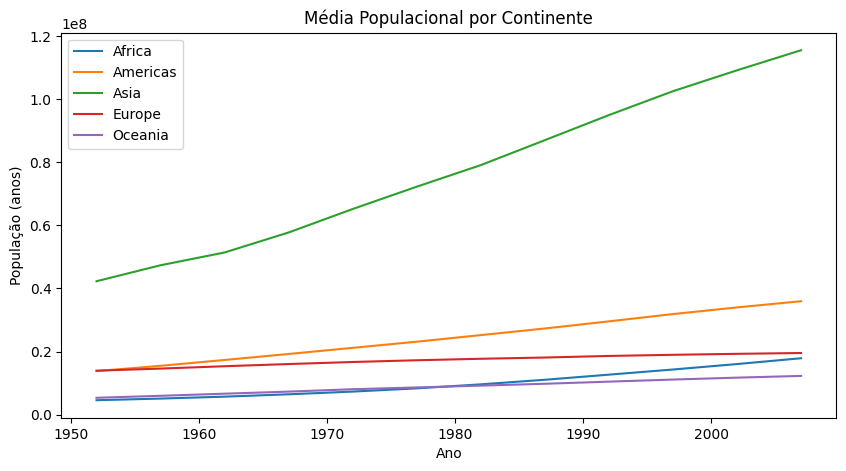

In [6]:
groupList = df.groupby(['year', 'continent'])['pop'].mean().unstack()
plot_line_chart(df, groupList, title = "Média Populacional por Continente", xLabel = "Ano", yLabel = "População (anos)")

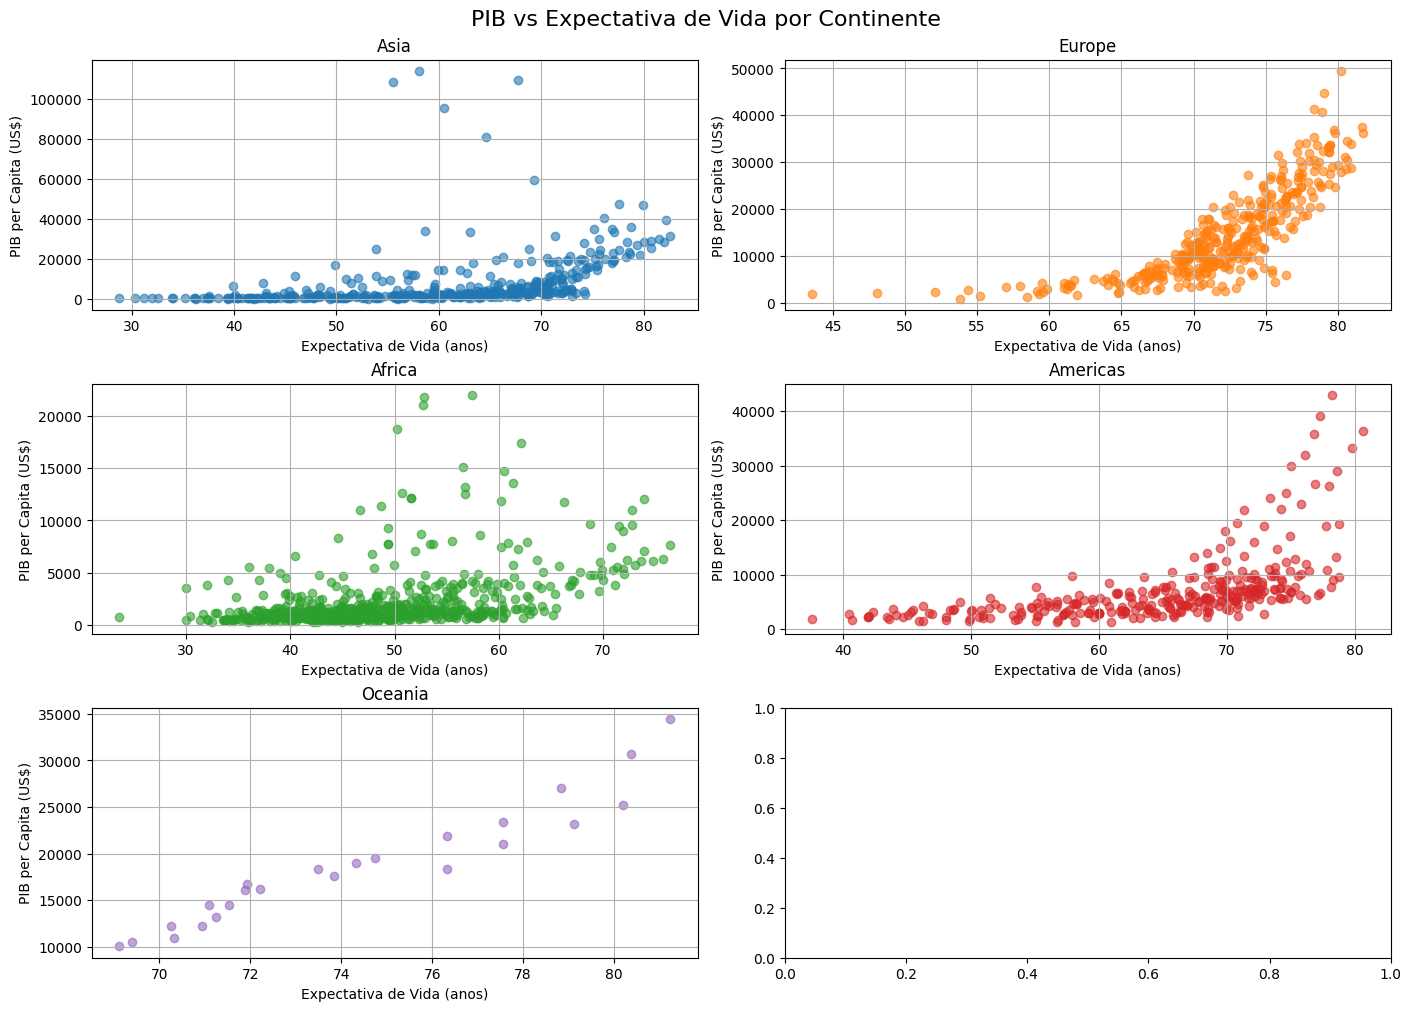

In [91]:
continentsList = df['continent'].unique().tolist()
nRows = len(continentsList) - (len(continentsList) // 2 ) 

scatter_subplots(df, 
                'continent', 
                dfXColFieldName='lifeExp', 
                dfYColFieldName='gdpPercap',
                nRows=nRows, 
                nCols=2, 
                dataToAnalyze=continentsList, 
                x_colLabel='Expectativa de Vida (anos)', 
                y_colLabel='PIB per Capita (US$)',
                titulo_geral="PIB vs Expectativa de Vida por Continente",
                )